# PCA with replicate dataset
Dataset: urea in water absorbance spectra with replicates of 3
- Uses `uvvis_absorbances_w_repliacates_shape.csv` which is in the correct shape for regression
- Computes wavelength start and end for max r^2 values for both PLS and PCR

In [1]:
# Import packages

# Pandas library for the pandas dataframes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [77]:
# Import data

abs_data = pd.read_csv('uvvis_absorbances_w_replicates_shape.csv')

# Date Codes:
# 44482 = 10/13/2021
# 44496 = 10/27/2021
# 44418 = 8/10/2021

### Specify features (X) and target (y)

In [97]:
X = abs_data.iloc[:, 10:25].values
y = abs_data[['urea_concentration (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

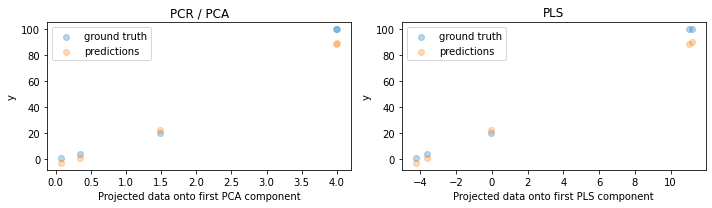

In [98]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [99]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared 0.973
PLS r-squared 0.975


## Find best range of wavelength data

In [96]:
# Create integer lists of starting wavelengths and stopping wavelengths to probe
start_wl = np.linspace(1, 10, num=10)
start_wl = [round(x) for x in start_wl]
stop_wl = np.linspace(11, 100, num=90)
stop_wl = [round(x) for x in stop_wl]

# Initiate lists for results
starting_wavelength = []
stopping_wavelength = []
pcr_r_squared = []
pls_r_squared = []

for start in start_wl:
    for stop in stop_wl:
        X = abs_data.iloc[:, start:stop].values
        y = abs_data[['urea_concentration (mM)']].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)
        
        pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
        pcr.fit(X_train, y_train)
        pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

        pls = PLSRegression(n_components=1)
        pls.fit(X_train, y_train)
        
        starting_wavelength.append(start)
        stopping_wavelength.append(stop)
        pcr_r_squared.append(pcr.score(X_test, y_test))
        pls_r_squared.append(pls.score(X_test, y_test))
        
# Choose the highest pcr and pls scores and report
pcr_array = np.array(pcr_r_squared)
pcr_max_index = pcr_array.argmax()

pls_array = np.array(pls_r_squared)
pls_max_index = pls_array.argmax()

print(f'Max principal components regression (PCR) score: {pcr_r_squared[pcr_max_index]}')
print(f'Max PCR score starting wavelength: {starting_wavelength[pcr_max_index]}')
print(f'Max PCR score stopping wavelength: {stopping_wavelength[pcr_max_index]}')

print(f'Max partial least squasres (PLS) regression score: {pls_r_squared[pls_max_index]}')
print(f'Max PLS score starting wavelength: {starting_wavelength[pls_max_index]}')
print(f'Max PLS score stopping wavelength: {stopping_wavelength[pls_max_index]}')

Max principal components regression (PCR) score: 0.9728822553245573
Max PCR score starting wavelength: 10
Max PCR score stopping wavelength: 25
Max partial least squasres (PLS) regression score: 0.9747855209174179
Max PLS score starting wavelength: 10
Max PLS score stopping wavelength: 25
